In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('mpg')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [88]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [89]:
df.tail(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
388,26.0,4,156.0,92.0,2585,14.5,82,usa,chrysler lebaron medallion
389,22.0,6,232.0,112.0,2835,14.7,82,usa,ford granada l
390,32.0,4,144.0,96.0,2665,13.9,82,japan,toyota celica gt
391,36.0,4,135.0,84.0,2370,13.0,82,usa,dodge charger 2.2
392,27.0,4,151.0,90.0,2950,17.3,82,usa,chevrolet camaro
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [91]:
df.dropna(inplace=True) #결측값 제거

In [92]:
df.shape

(392, 9)

In [93]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


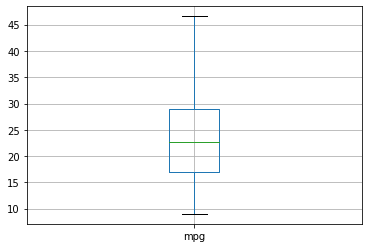

In [94]:
df.boxplot(column='mpg')

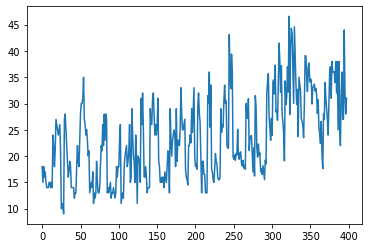

In [95]:
plt.plot(df['mpg'])

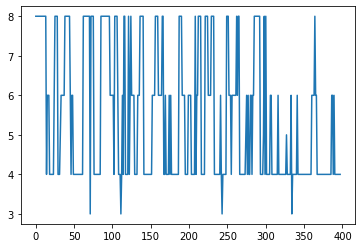

In [96]:
plt.plot(df['cylinders'])

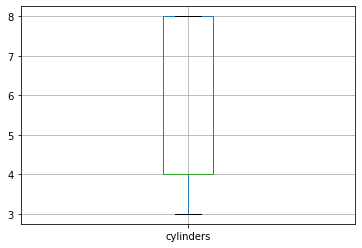

In [97]:
df.boxplot(column='cylinders')

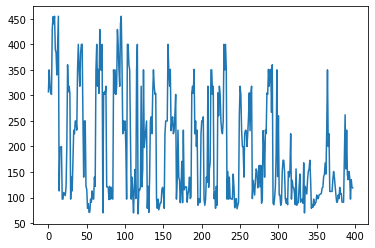

In [98]:
plt.plot(df['displacement'])

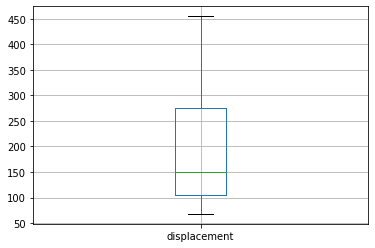

In [99]:
df.boxplot(column='displacement')

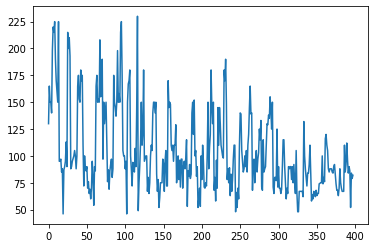

In [100]:
plt.plot(df['horsepower'])

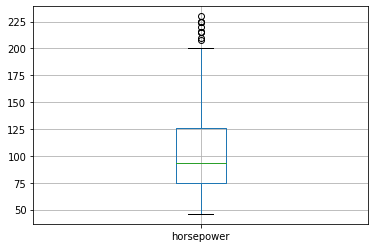

In [101]:
df.boxplot(column='horsepower')

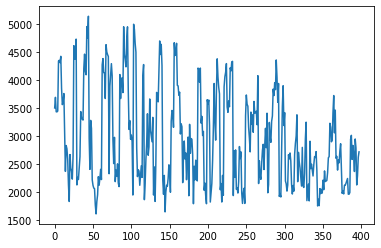

In [102]:
plt.plot(df['weight'])

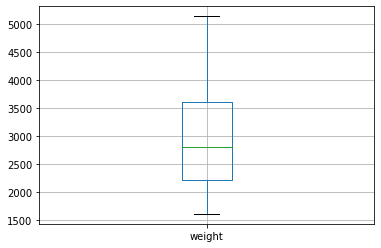

In [103]:
df.boxplot(column='weight')

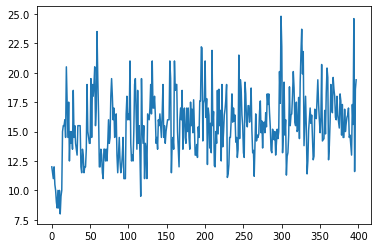

In [104]:
plt.plot(df['acceleration'])

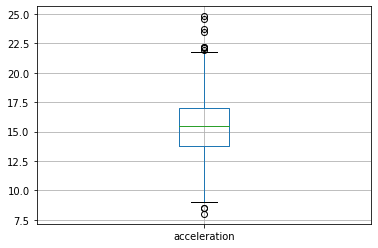

In [105]:
df.boxplot(column='acceleration')

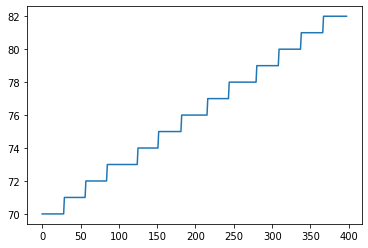

In [106]:
plt.plot(df['model_year'])

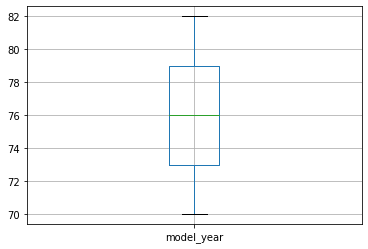

In [107]:
df.boxplot(column='model_year')

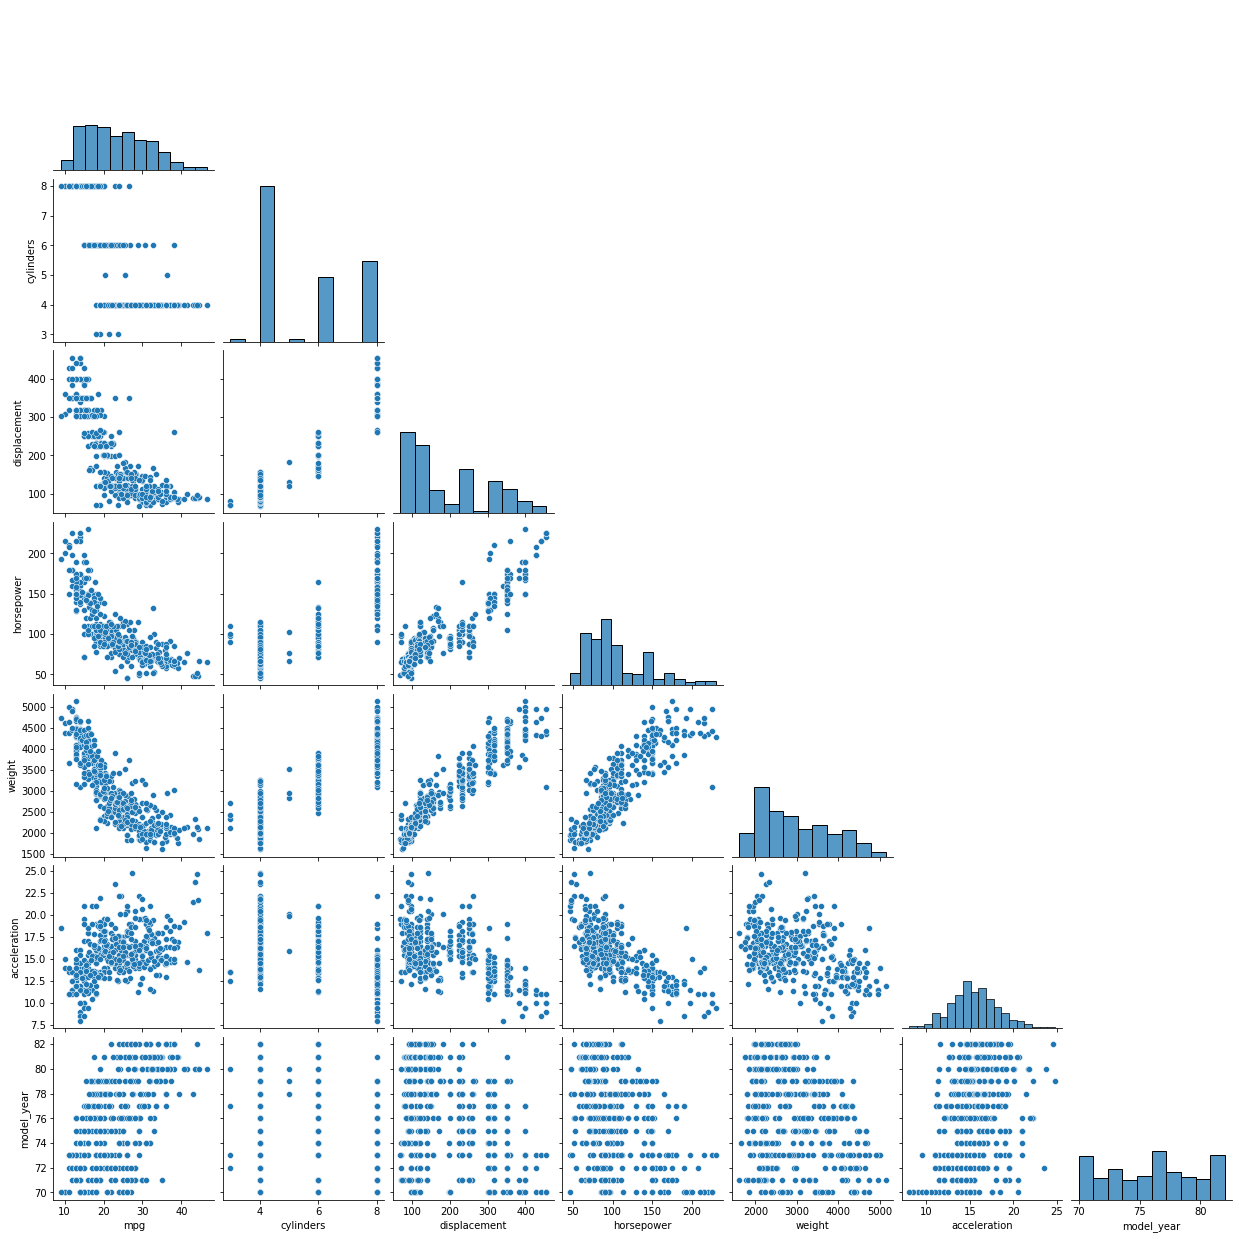

In [108]:
sns.pairplot(df,corner=True)

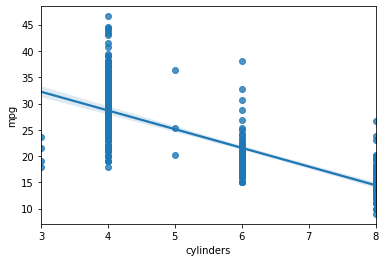

In [109]:
sns.regplot(data= df,x ='cylinders' , y = 'mpg')

Text(0.5, 1.0, 'x=displacement, y=mpg')

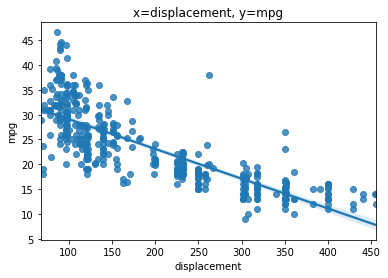

In [110]:
sns.regplot(data= df,x ='displacement' , y = 'mpg')
plt.title('x=displacement, y=mpg')

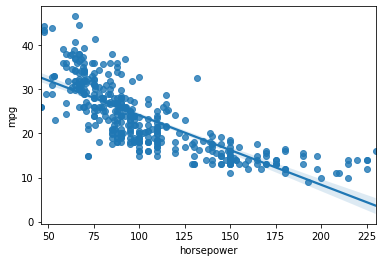

In [111]:
sns.regplot(data= df,x ='horsepower' , y = 'mpg')

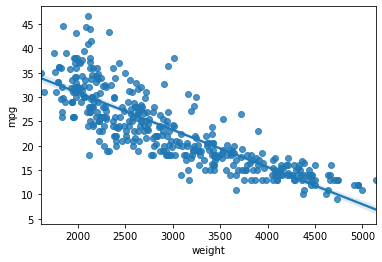

In [112]:
sns.regplot(data= df,x ='weight' , y = 'mpg')

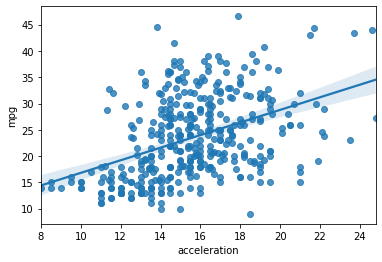

In [113]:
sns.regplot(data= df,x ='acceleration' , y = 'mpg')

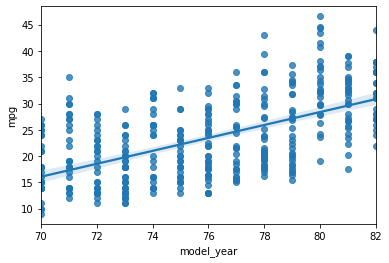

In [114]:
sns.regplot(data= df,x ='model_year' , y = 'mpg')

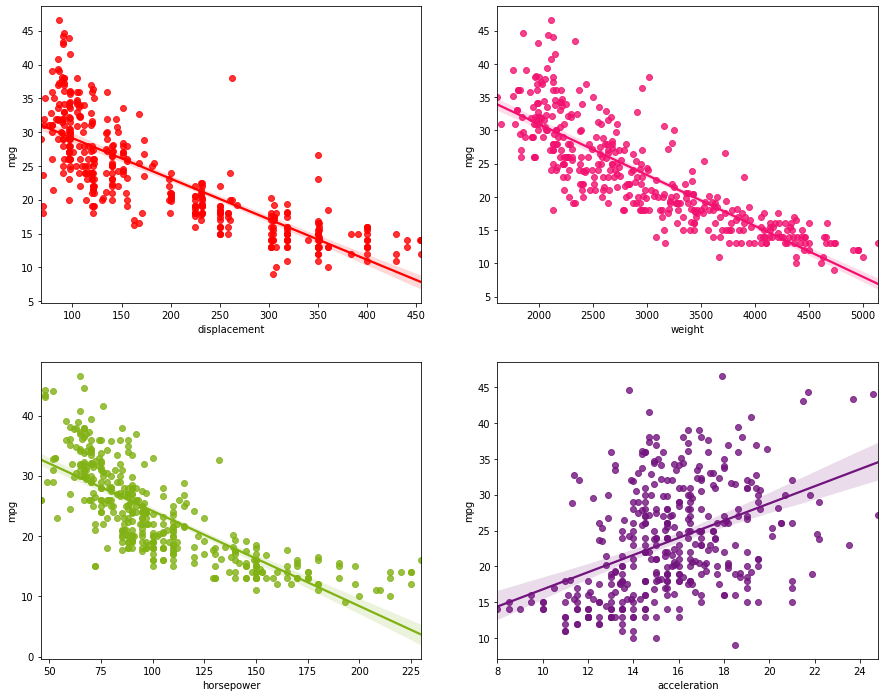

In [115]:
fig, ax = plt.subplots(2,2,figsize=(15,12))
sns.regplot(data= df,x ='displacement' , y = 'mpg',ax=ax[0,0],color='red')
sns.regplot(data= df,x ='horsepower' , y = 'mpg',ax=ax[1,0],color='#81b214')
sns.regplot(data= df,x ='weight' , y = 'mpg',ax=ax[0,1],color='#f21170')
sns.regplot(data= df,x ='acceleration' , y = 'mpg',ax=ax[1,1],color='#72147e')

In [116]:
df_origin = df.groupby(df['origin']).mean()
df_origin

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
origin,,,,,,,
europe,27.602941,4.161765,109.632353,80.558824,2433.470588,16.794118,75.676471
japan,30.450633,4.101266,102.708861,79.835443,2221.227848,16.172152,77.443038
usa,20.033469,6.277551,247.512245,119.048980,3372.489796,14.990204,75.591837


Text(0.5, 1.0, 'Feature by Origin')

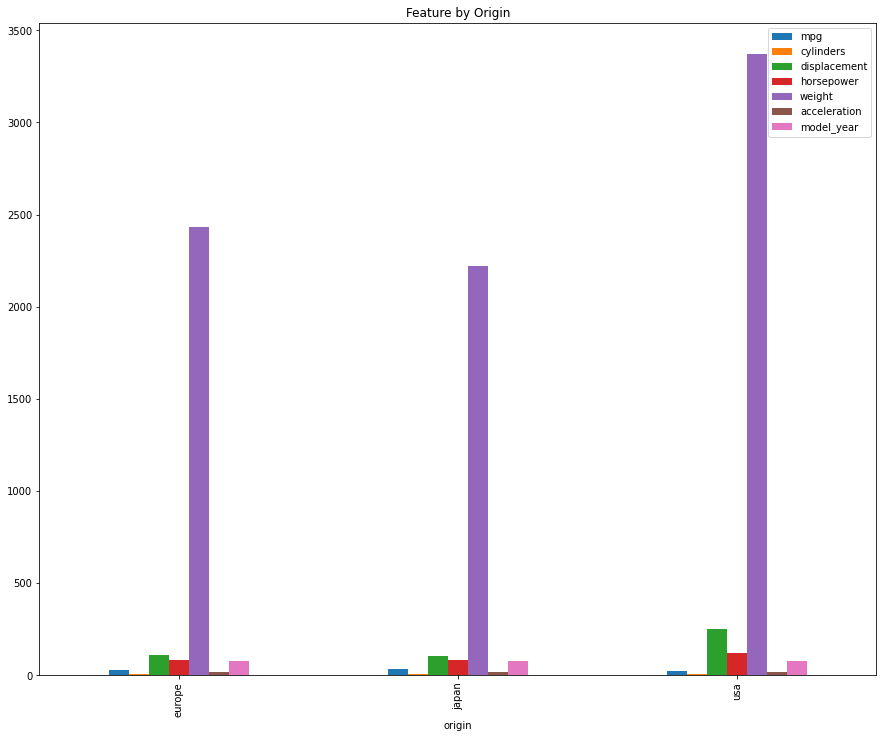

In [117]:
df_origin.plot(kind='bar',figsize=(15,12))
plt.title('Feature by Origin')

#### multiple regression

In [128]:
from sklearn.model_selection import train_test_split

# regression model을 만들기 위해 데이터셋 분할 - train 0.8, test 0.2 비율
# mpg와 선형 관계에 있는 4가지 변수만 사용해서 선형회귀 모델을 만들기로 함

features = ['displacement','horsepower','weight','acceleration']
mpg = 'mpg'

data = df[features]
target = df[mpg]

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2,random_state=11)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(313, 4) (79, 4) (313,) (79,)


In [129]:
from sklearn.linear_model import LinearRegression

#linear regression(선형회귀) 모델을 이용하여 여러개의 독립변수로 하나의 종속변수를 예측할 수 있는 모델 만들기

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [130]:
y_pred = model.predict(X_test)

In [131]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score

mse = round(mean_squared_error(y_test,y_pred),2)
mae = round(mean_absolute_error(y_test,y_pred),2)
r2 = round(r2_score(y_test,y_pred),2)

print('MSE =',mse,'\nMAE =',mae,'\nR2 score =',r2)

# MSE = Mean Squared Error, 모델의 예측값과 실제값의 차이를 모두 더한다는 개념, 절대값을 취하기 때문에 가장 직관적으로 알 수 있는 지표
# MAE = Mean Absolute Error, 모델의 예측값과 실제값 차이의 면적의 합
# R2 score = 결정계수, 상대적으로 얼마나 성능이 나오는지를 측정한 지표, 결정계수가 1에 가까울수록 모델의 성능이 높다

MSE = 22.89 
MAE = 3.33 
R2 score = 0.66
